# In this project we are going to do the exploratory data analysis and are going to make a suitable machine learning model of a dataset containg data about A consideration and give predictions/prescriptions that would help farmersto increase their crop productivity, and hence gain more profit by being we need to create a ML Model that takes all the above factors and create a machine learning model.

In [1]:
#importing needed libraries.

In [2]:
import numpy as np   #for numerical analysis

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt       #for visualizatiins

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns            #for visualizations

In [7]:
#imported the dataset of State Wise Major Crop Production as mcp

In [8]:
mcp= pd.read_csv(r"C:\Users\pk859\Downloads\1State Wise Major Crop Production.csv")

In [9]:
mcp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [10]:
mcp.sample(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
6828,Andhra Pradesh,SPSR NELLORE,2011,Kharif,Dry chillies,24.0,91.0
95877,Karnataka,TUMKUR,1999,Kharif,Urad,833.0,271.0
184513,Tamil Nadu,RAMANATHAPURAM,2008,Whole Year,Sugarcane,323.0,34307.0
35163,Bihar,KISHANGANJ,2005,Kharif,Maize,151.0,283.0
226853,Uttar Pradesh,SANT KABEER NAGAR,1999,Kharif,Small millets,67.0,44.0
13829,Assam,BONGAIGAON,2012,Whole Year,Turmeric,265.0,211.0
210109,Uttar Pradesh,FATEHPUR,1999,Rabi,Linseed,238.0,89.0
169329,Rajasthan,DHOLPUR,2003,Whole Year,Sweet potato,39.0,39.0
242749,West Bengal,MALDAH,1997,Whole Year,Arhar/Tur,224.0,220.0
70901,Haryana,SONIPAT,2000,Whole Year,Sweet potato,53.0,1200.0


In [11]:
mcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [12]:
mcp.duplicated().sum()

0

In [13]:
#so,we have 0 duplicated values in the mcp dataset

In [14]:
mcp.isnull().sum()/mcp.isnull().count()*100      #calculating the total percentage  of missing values

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [15]:
mcp.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [16]:
#we have to deal with the null values in the mcp dataset

In [17]:
mcp["Production"].dropna()

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 242361, dtype: float64

In [18]:
#importing dataset of Crop Dependence on Various Factors:-- as vf

In [19]:
vf=pd.read_csv(r"C:\Users\pk859\Downloads\2.Crop Dependence on Various Factors.csv")

In [20]:
vf

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [21]:
#checking for all the unique values in the vf 

In [22]:
for i in vf.columns:
    print(f"unnique{i}'s count:{vf[i].nunique()}")
    print(f"{vf[i].unique()}\n")

unniquetemperature's count:3000
[20.87974371 21.77046169 23.00445915 ... 25.3310446  26.89750174
 26.98603693]

unniquehumidity's count:3100
[82.00274423 80.31964408 82.3207629  ... 84.30533791 83.89241484
 89.4138489 ]

unniqueph's count:3100
[6.50298529 7.03809636 7.84020714 ... 6.90424171 6.46327108 6.26083896]

unniquerainfall's count:3100
[202.9355362  226.6555374  263.9642476  ...  41.53218699  43.97193745
  58.54876687]

unniquelabel's count:31
['rice' 'wheat' 'Mung Bean' 'Tea' 'millet' 'maize' 'Lentil' 'Jute'
 'Coffee' 'Cotton' 'Ground Nut' 'Peas' 'Rubber' 'Sugarcane' 'Tobacco'
 'Kidney Beans' 'Moth Beans' 'Coconut' 'Black gram' 'Adzuki Beans'
 'Pigeon Peas' 'Chickpea' 'banana' 'grapes' 'apple' 'mango' 'muskmelon'
 'orange' 'papaya' 'pomegranate' 'watermelon']



In [23]:
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [24]:
vf.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [25]:
vf.isnull().sum()/vf.isnull().count()*100

temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [26]:
vf.duplicated().sum()

0

In [27]:
#importing dataset of  Ideal value of pH for various crops as ph

In [28]:
ph=pd.read_csv(r"C:\Users\pk859\Downloads\3Ideal value of pH for various crops.csv")

In [29]:
ph

,Crop,Ph
0,Bajra,3.00
1,Banana,6.50
2,Barley,3.00
3,Bean,5.50
4,Black pepper,6.40
5,Blackgram,5.00
6,Bottle Gourd,6.50
7,Brinjal,5.50
8,Cabbage,5.50
9,Cardamom,4.50


In [30]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    58 non-null     object 
 1    Ph     58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [31]:
ph.isnull().sum()

Crop    0
 Ph     0
dtype: int64

In [32]:
ph.duplicated().sum()

0

In [33]:
#importing dataset of State Wise Cost of Production as cost

In [34]:
cost=pd.read_csv(r"C:\Users\pk859\Downloads\4State Wise Cost of Production.csv")

In [35]:
cost

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [36]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [37]:
cost.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [38]:
cost.duplicated().sum()

0

In [39]:
#importing dataset of Actual Crop Yield based on Various Factors as yeild

In [40]:
yeild=pd.read_csv(r"C:\Users\pk859\Downloads\5Actual Crop Yield based on Various Factors.csv")

In [41]:
yeild

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000,Wheat
189228,770.28486,27.0,6.0,Wheat,10.40000,Wheat
189229,770.00000,26.0,6.1,Wheat,10.40000,Wheat
189230,633.83459,22.0,6.2,Wheat,10.40000,Wheat


In [42]:
yeild.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189232 entries, 0 to 189231
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Rainfall        189232 non-null  float64
 1   Temperature     189232 non-null  float64
 2   Ph              189232 non-null  float64
 3   Crop            189232 non-null  object 
 4   Production      189232 non-null  float64
 5   Cropconversion  189232 non-null  object 
dtypes: float64(4), object(2)
memory usage: 8.7+ MB


In [43]:
yeild.isnull().sum()

Rainfall          0
Temperature       0
Ph                0
Crop              0
Production        0
Cropconversion    0
dtype: int64

In [44]:
yeild.duplicated().sum()

18234

In [45]:
#we have to deal with the duplicate values in the yeild dataset

In [46]:
yeild.drop_duplicates(inplace=True)

In [47]:
yeild.duplicated().sum()

0

In [48]:
#so,we have dropped all the duplicate values from the dataset

In [49]:
mcp.sample(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
117026,Madhya Pradesh,RAISEN,2003,Kharif,Other Kharif pulses,1391.0,495.0
220010,Uttar Pradesh,LUCKNOW,2005,Whole Year,Dry chillies,100.0,91.0
52315,Chhattisgarh,KORBA,2006,Kharif,Other Kharif pulses,391.0,338.0
144708,Nagaland,MON,2006,Rabi,Wheat,160.0,140.0
39371,Bihar,PATNA,1998,Kharif,Castor seed,50.0,42.0


In [50]:
mcp["State_Name"]

0         Andaman and Nicobar Islands
1         Andaman and Nicobar Islands
2         Andaman and Nicobar Islands
3         Andaman and Nicobar Islands
4         Andaman and Nicobar Islands
                     ...             
246086                    West Bengal
246087                    West Bengal
246088                    West Bengal
246089                    West Bengal
246090                    West Bengal
Name: State_Name, Length: 246091, dtype: object

In [51]:
mcp["Production"].max()

1250800000.0

In [52]:
#so,we have highest number of production 

In [53]:
mcp["State_Name"].value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [54]:
#we have most number of datapoints from the uttar pradesh followed by m.p and karnataka and least of chandigarh

In [55]:
mcp["Crop_Year"].value_counts()

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

In [56]:
mcp["Crop"].value_counts()             #here we have value count of each and every recorruring value.

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [57]:
mcp.groupby(["State_Name"])["Production"].mean().sort_values()

State_Name
Chandigarh                     7.186124e+02
Mizoram                        1.741656e+03
Arunachal Pradesh              2.681302e+03
Nagaland                       3.269967e+03
Sikkim                         3.411394e+03
Manipur                        4.131846e+03
Meghalaya                      4.224798e+03
Dadra and Nagar Haveli         7.026125e+03
Himachal Pradesh               7.249661e+03
Jammu and Kashmir              8.144005e+03
Jharkhand                      8.513224e+03
Tripura                        8.868921e+03
Chhattisgarh                   9.736874e+03
Odisha                         1.189767e+04
Bihar                          1.941738e+04
Madhya Pradesh                 1.985670e+04
Rajasthan                      2.331512e+04
Uttarakhand                    2.739427e+04
Karnataka                      4.096161e+04
Telangana                      5.994418e+04
Gujarat                        6.267679e+04
Haryana                        8.398103e+04
Uttar Pradesh        

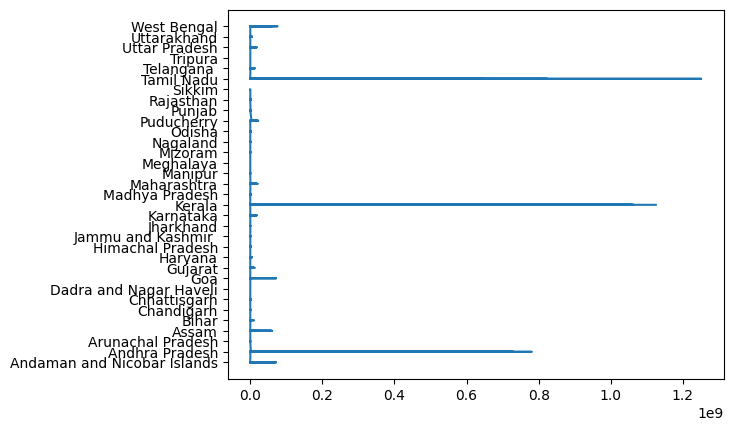

In [58]:
plt.plot(mcp["Production"],mcp["State_Name"])

In [59]:
#we are going to normalise our production column so,that can easily derive our outcome

In [60]:
mcp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


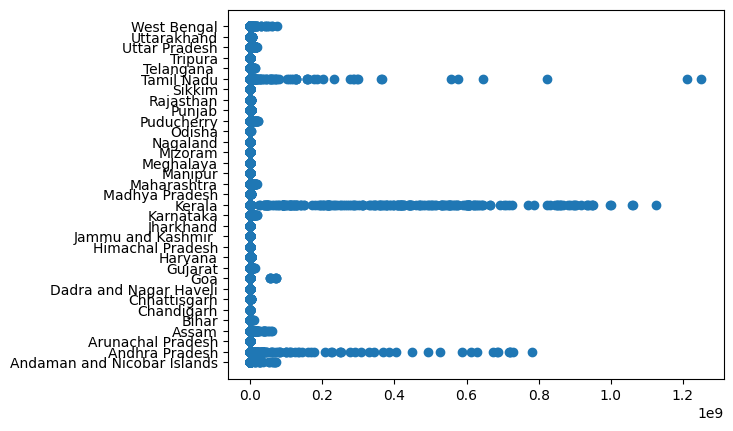

In [61]:
plt.scatter(mcp["Production"],mcp["State_Name"])

In [62]:
mcp["Production"].sort_values

<bound method Series.sort_values of 0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 246091, dtype: float64>

In [63]:
mcp.sort_values(by="Production")

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
61213,Gujarat,KHEDA,2000,Rabi,Other Rabi pulses,100.0,0.0
99949,Kerala,KOTTAYAM,2003,Whole Year,Snak Guard,207.0,0.0
165486,Rajasthan,BANSWARA,2003,Whole Year,Other Vegetables,354.0,0.0
100190,Kerala,KOZHIKODE,2002,Whole Year,Bhindi,5.0,0.0
100191,Kerala,KOZHIKODE,2002,Whole Year,Bitter Gourd,20.0,0.0
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.0,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.0,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.0,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.0,NaN


In [64]:
mcp_max=mcp.groupby(["State_Name","District_Name","Crop"])["Production"].max()

In [65]:
mcp_max.shape

(22676,)

In [66]:
mcp_max

State_Name                   District_Name  Crop        
Andaman and Nicobar Islands  NICOBARS       Arecanut            2083.00
                                            Banana              3425.00
                                            Black pepper          15.86
                                            Cashewnut            260.50
                                            Coconut         71300000.00
                                                               ...     
West Bengal                  PURULIA        Sunflower            727.00
                                            Tobacco                5.00
                                            Turmeric             378.00
                                            Urad                8030.00
                                            Wheat               9944.00
Name: Production, Length: 22676, dtype: float64

In [67]:
#here we got the maximum production value in the each distict of the each state 

In [68]:
#now,going to make a dataframe of the above.

In [69]:
df=pd.DataFrame(mcp_max, columns= ["State_Name1","District_Name1","Production"])

In [70]:
df

State_Name1  \
State_Name                  District_Name Crop                       
Andaman and Nicobar Islands NICOBARS      Arecanut             NaN   
                                          Banana               NaN   
                                          Black pepper         NaN   
                                          Cashewnut            NaN   
                                          Coconut              NaN   
...                                                            ...   
West Bengal                 PURULIA       Sunflower            NaN   
                                          Tobacco              NaN   
                                          Turmeric             NaN   
                                          Urad                 NaN   
                                          Wheat                NaN   

                                                       District_Name1  \
State_Name                  District_Name Crop                          
Andaman and Nicobar Islands NICOBARS      Arecanut                NaN   
                                          Banana                  NaN   
                                          Black pepper            NaN   
                                          Cashewnut               NaN   
                                          Coconut                 NaN   
...                                                               ...   
West Bengal                 PURULIA       Sunflower               NaN   
                                          Tobacco                 NaN   
                                          Turmeric                NaN   
                                          Urad                    NaN   
                                          Wheat                   NaN   

                                                         Production  
State_Name                  District_Name Crop                       
Andaman and Nicobar Islands NICOBARS      Arecanut          2083.00  
                                          Banana            3425.00  
                                          Black pepper        15.86  
                                          Cashewnut          260.50  
                                          Coconut       71300000.00  
...                                                             ...  
West Bengal                 PURULIA       Sunflower          727.00  
                                          Tobacco              5.00  
                                          Turmeric           378.00  
                                          Urad              8030.00  
                                          Wheat             9944.00  

[22676 rows x 3 columns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22676 entries, ('Andaman and Nicobar Islands', 'NICOBARS', 'Arecanut') to ('West Bengal', 'PURULIA', 'Wheat')
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State_Name1     0 non-null      object 
 1   District_Name1  0 non-null      object 
 2   Production      22415 non-null  float64
dtypes: float64(1), object(2)
memory usage: 627.5+ KB


In [72]:
df.sample(50)

State_Name1  \
State_Name         District_Name     Crop                                
Madhya Pradesh     RAISEN            Wheat                         NaN   
Uttar Pradesh      LUCKNOW           Soyabean                      NaN   
                   BAREILLY          Arhar/Tur                     NaN   
Madhya Pradesh     BALAGHAT          Horse-gram                    NaN   
                   RATLAM            Potato                        NaN   
Andhra Pradesh     ANANTAPUR         Mesta                         NaN   
Mizoram            SERCHHIP          Other Kharif pulses           NaN   
Madhya Pradesh     TIKAMGARH         Other Kharif pulses           NaN   
                   SAGAR             Dry chillies                  NaN   
Jammu and Kashmir  SRINAGAR          other oilseeds                NaN   
Assam              NAGAON            Banana                        NaN   
Uttar Pradesh      UNNAO             Sannhamp                      NaN   
Karnataka          UDUPI             Arecanut                      NaN   
Madhya Pradesh     UJJAIN            Other  Rabi pulses            NaN   
Tamil Nadu         KRISHNAGIRI       Papaya                        NaN   
Madhya Pradesh     SHIVPURI          Citrus Fruit                  NaN   
                   SIDHI             Banana                        NaN   
Haryana            PANCHKULA         Mango                         NaN   
Madhya Pradesh     SIDHI             Other Kharif pulses           NaN   
Tamil Nadu         VELLORE           Rapeseed &Mustard             NaN   
Assam              BAKSA             Masoor                        NaN   
Uttar Pradesh      JAUNPUR           Potato                        NaN   
Maharashtra        OSMANABAD         Total foodgrain               NaN   
Tamil Nadu         TIRUNELVELI       Rapeseed &Mustard             NaN   
                   THIRUVALLUR       Gram                          NaN   
Odisha             GAJAPATI          Linseed                       NaN   
Uttar Pradesh      SANT KABEER NAGAR Linseed                       NaN   
Andhra Pradesh     ANANTAPUR         Other Fresh Fruits            NaN   
Madhya Pradesh     DEWAS             Rapeseed &Mustard             NaN   
West Bengal        MURSHIDABAD       Khesari                       NaN   
Telangana          MEDAK             Other Vegetables              NaN   
Odisha             KHORDHA           Horse-gram                    NaN   
Madhya Pradesh     MANDSAUR          Urad                          NaN   
Telangana          NALGONDA          Dry chillies                  NaN   
Uttar Pradesh      MORADABAD         Other  Rabi pulses            NaN   
Bihar              SUPAUL            Barley                        NaN   
Kerala             WAYANAD           Tea                           NaN   
Bihar              MADHEPURA         Jowar                         NaN   
                   GOPALGANJ         Peas & beans (Pulses)         NaN   
                   PURBI CHAMPARAN   Masoor                        NaN   
Uttarakhand        UTTAR KASHI       Masoor                        NaN   
Gujarat            AHMADABAD         Moth                          NaN   
West Bengal        DINAJPUR UTTAR    Barley                        NaN   
Madhya Pradesh     VIDISHA           Pome Fruit                    NaN   
                   DHAR              Horse-gram                    NaN   
Andhra Pradesh     WEST GODAVARI     Sugarcane                     NaN   
Uttar Pradesh      AMBEDKAR NAGAR    Potato                        NaN   
Odisha             RAYAGADA          Ragi                          NaN   
Telangana          RANGAREDDI        Potato                        NaN   
Chhattisgarh       DURG              Rice                          NaN   

                                                           District_Name1  \
State_Name         District_Name     Crop                                   
Madhya Pradesh     RAISEN            Wheat              

In [73]:
df.drop(["State_Name1","District_Name1"],axis=1,inplace=True)

In [74]:
df.sample(10)

,,,Production
State_Name,District_Name,Crop,
Rajasthan,JODHPUR,Onion,167027.0
Himachal Pradesh,LAHUL AND SPITI,Masoor,1.0
Bihar,MUZAFFARPUR,Banana,25653.0
Jharkhand,KHUNTI,Wheat,375.0
Kerala,KASARAGOD,Brinjal,0.0
Meghalaya,SOUTH GARO HILLS,Banana,4038.0
Nagaland,PHEK,Cardamom,260.0
Karnataka,SHIMOGA,Sunflower,4667.0
Bihar,KATIHAR,Tobacco,192.0


# the best crop to grow in each State. as we have the number of maximum production of every state .

now,we are going to create a model based on these datasets

In [75]:
#now going to use label encoder for the transformation of categorical column to the numerical.

In [76]:
mcp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
lb=LabelEncoder()

In [79]:
mcp["State_Name"]=lb.fit_transform(mcp["State_Name"])

In [80]:
mcp["District_Name"]=lb.fit_transform(mcp["District_Name"])

In [81]:
mcp["Season"]=lb.fit_transform(mcp["Season"])

In [82]:
mcp["Crop"]=lb.fit_transform(mcp["Crop"])

In [83]:
mcp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


In [84]:
#so, till here we have used label encoder for changing categorial data into numerical 

In [85]:
x=mcp.drop(["Production"],axis=1)

In [86]:
y=mcp["Production"].values

In [87]:
y

array([2.00000e+03, 1.00000e+00, 3.21000e+02, ..., 1.62500e+04,
       5.97899e+05, 8.80000e+01])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model=DecisionTreeClassifier()

In [92]:
#model.fit(x_train,y_train)

In [93]:
mcp[mcp["Production"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [94]:
mcp["Production"]

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 246091, dtype: float64

In [95]:
mcp[mcp["State_Name"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [96]:
mcp[mcp["District_Name"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [97]:
mcp[mcp["Crop_Year"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [98]:
mcp[mcp["Crop"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [99]:
mcp[mcp["Season"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [100]:
mcp[mcp["Area"]=="NaN"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [101]:
y

array([2.00000e+03, 1.00000e+00, 3.21000e+02, ..., 1.62500e+04,
       5.97899e+05, 8.80000e+01])

In [102]:
mcp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


# Creating an interface(using statements), where the user inputs their Geographic Location(District), and based on that our model should generate output prescribing them the best crop to grow in that region.

In [103]:
x1=mcp["District_Name"].values.reshape(-1,1)

In [104]:
y1=mcp["Crop"].values.reshape(-1,1)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
mod=DecisionTreeClassifier()

In [109]:
mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
mod.score(x1,y1)

0.0761710099109679

In [111]:
mod.predict([[427]])

array([2])

In [112]:
#here we have created a decesion classifier model through which we can predict crop on the basis of distict

In [113]:
##########################

In [114]:
yeild

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000,Wheat
189228,770.28486,27.0,6.0,Wheat,10.40000,Wheat
189229,770.00000,26.0,6.1,Wheat,10.40000,Wheat
189230,633.83459,22.0,6.2,Wheat,10.40000,Wheat


In [115]:
yeild.drop(["Cropconversion"],axis=1,inplace=True)              #dropped Cropconversion column as we didnt need that for our further analysis

In [116]:
yeild

,Rainfall,Temperature,Ph,Crop,Production
0,400.15082,20.0,3.0,Bajra,0.00690
1,400.16331,20.0,3.2,Bajra,0.00747
2,400.16387,20.0,3.2,Bajra,0.00749
3,400.17967,20.0,3.2,Bajra,0.00822
4,400.19582,20.0,3.2,Bajra,0.00895
...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000
189228,770.28486,27.0,6.0,Wheat,10.40000
189229,770.00000,26.0,6.1,Wheat,10.40000
189230,633.83459,22.0,6.2,Wheat,10.40000


In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
lb=LabelEncoder()

In [119]:
yeild["Crop"]=lb.fit_transform(yeild["Crop"])

In [120]:
yeild

,Rainfall,Temperature,Ph,Crop,Production
0,400.15082,20.0,3.0,0,0.00690
1,400.16331,20.0,3.2,0,0.00747
2,400.16387,20.0,3.2,0,0.00749
3,400.17967,20.0,3.2,0,0.00822
4,400.19582,20.0,3.2,0,0.00895
...,...,...,...,...,...
189227,766.92202,23.0,6.0,57,10.40000
189228,770.28486,27.0,6.0,57,10.40000
189229,770.00000,26.0,6.1,57,10.40000
189230,633.83459,22.0,6.2,57,10.40000


In [121]:
yeild.isnull().sum()

Rainfall       0
Temperature    0
Ph             0
Crop           0
Production     0
dtype: int64

In [122]:
yeild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170998 entries, 0 to 189231
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Rainfall     170998 non-null  float64
 1   Temperature  170998 non-null  float64
 2   Ph           170998 non-null  float64
 3   Crop         170998 non-null  int32  
 4   Production   170998 non-null  float64
dtypes: float64(4), int32(1)
memory usage: 7.2 MB


In [123]:
x2=yeild.drop(["Production"],axis=1).values

In [124]:
y2=yeild["Production"].values

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [127]:
x_train1

array([[ 545.64666,   25.     ,    6.4    ,   47.     ],
       [ 648.50199,   18.8    ,    5.7    ,   13.     ],
       [ 722.8929 ,   18.9    ,    6.3    ,   13.     ],
       ...,
       [ 568.2085 ,   21.     ,    6.8    ,   47.     ],
       [ 504.82625,   24.505  ,    6.7    ,   50.     ],
       [1144.79965,   21.     ,    7.     ,   44.     ]])

In [128]:
x_test1

array([[922.55685,  27.57876,   6.5    ,  32.     ],
       [408.37438,  21.15   ,   6.     ,  26.     ],
       [490.65541,  29.8    ,   6.5    ,   1.     ],
       ...,
       [643.79288,  24.81054,   6.3    ,  21.     ],
       [776.36364,  29.04   ,   5.8    ,  43.     ],
       [667.68519,  31.     ,   5.8    ,  57.     ]])

In [129]:
y_train1

array([0.45647, 0.33574, 1.50604, ..., 0.68208, 2.09653, 2.89599])

In [130]:
y_test1

array([5.63409, 0.16749, 8.13108, ..., 0.79623, 1.09091, 1.7    ])

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf=RandomForestClassifier()

In [134]:
#rf.fit(x_train1,y_train1)